In [35]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas

training_file = "D:/Repo/lenin-search/corpus/ocr/pavlov-v1/t01/ocr-block-rows-manually-labeled-100-pages.csv"
target_file = "D:/Repo/lenin-search/corpus/ocr/pavlov-v1/t01/ocr-block-rows.csv"
result_file = "D:/Repo/lenin-search/corpus/ocr/pavlov-v1/t01/ocr-block-rows-auto-labeled.csv"

In [36]:
training_set = pandas.read_csv(training_file) 
training_set.head()

,FileName,BlockIndex,BottomIndent,LeftIndent,RightIndent,TopIndent,PixelsPerSymbol,Label
0,image-000,0,836,181,174,325,37.083333,Garbage
1,image-002,0,1155,305,61,54,16.074074,Paragraph
2,image-002,1,1120,359,122,89,15.190476,Paragraph
3,image-002,2,1084,410,179,125,15.071429,Paragraph
4,image-003,0,1147,59,79,49,21.354839,Garbage


In [37]:
X = training_set[['BottomIndent','LeftIndent','RightIndent','TopIndent','PixelsPerSymbol']].values
Y = training_set['Label'].values
label_encoder = preprocessing.LabelEncoder()
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
Y = label_encoder.fit_transform(Y)
x_train , x_test, y_train, y_test = train_test_split(X,Y)


[Text(139.52930672268909, 209.07692307692307, 'X[1] <= -0.741\ngini = 0.537\nsamples = 978\nvalue = [50, 576, 329, 23]'),
 Text(73.8529411764706, 192.35076923076923, 'X[4] <= -0.144\ngini = 0.328\nsamples = 377\nvalue = [21, 51, 304, 1]'),
 Text(35.168067226890756, 175.62461538461537, 'X[0] <= -1.255\ngini = 0.562\nsamples = 48\nvalue = [18, 26, 3, 1]'),
 Text(16.880672268907563, 158.89846153846153, 'X[4] <= -1.069\ngini = 0.266\nsamples = 19\nvalue = [16, 3, 0, 0]'),
 Text(11.253781512605043, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(22.507563025210086, 142.1723076923077, 'X[0] <= -1.492\ngini = 0.198\nsamples = 18\nvalue = [16, 2, 0, 0]'),
 Text(16.880672268907563, 125.44615384615385, 'X[3] <= 1.604\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0, 0]'),
 Text(11.253781512605043, 108.72, 'X[0] <= -1.496\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0, 0]'),
 Text(5.6268907563025214, 91.99384615384615, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'),
 Text(1

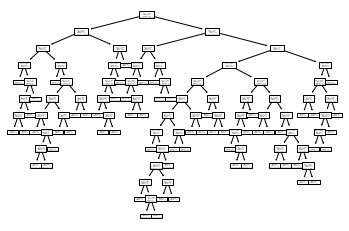

In [38]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [39]:
y_predict = clf.predict(x_test)
acc = accuracy_score(y_test, y_predict)
print('Accuracy: %.3f' % acc)


Accuracy: 0.933


In [40]:
target_set = pandas.read_csv(target_file)
x_target = target_set[['BottomIndent','LeftIndent','RightIndent','TopIndent','PixelsPerSymbol']].values
x_target = scaler.transform(x_target)
y_target = clf.predict(x_target)
labels_target = label_encoder.inverse_transform(y_target)
target_set['Label'] = labels_target
target_set.to_csv(result_file, encoding='utf-8', index=False)